<a href="https://colab.research.google.com/github/tanumay-deb/Covid-19-Detection-from-X-rays-Using-Transfer-Learning/blob/main/VGG16_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/My\ Drive/Dataset

[Errno 2] No such file or directory: 'drive/My Drive/Dataset'
/content/drive/My Drive/Dataset


In [ ]:
ls

' Dataset'/   ' Datasetnew'/  ' Datasetno8'/    ' Datasetnow'/
 Dataset/     ' Datasetno2'/  ' Datasetnon'/     plot1.png
' Dataset3'/  ' Datasetno5'/  ' Datasetnoner'/


In [ ]:
import os
import numpy as np
import shutil
import pandas as pd

In [ ]:



def train_test_split():
    print("########### Train Test Val Script started ###########")

    root_dir='/content/drive/My Drive/Dataset/ Datasetnis/CNN-Dataset'

    classes_dir=['COVID', 'Normal', 'Viral Pneumonia']

    processed_dir='/content/drive/My Drive/Dataset/Dataset/CNN-Dataset'

    val_ratio=0.20
    test_ratio=0.20

    for cls in classes_dir:
        # creating partitions of the data after shuffeling
        print("$$$$$$$ Class Name " + cls + " $$$$$$$")
        src = processed_dir +"/" + cls  # folder to copy images from

        allFileNames=os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames=np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames) * (1 - (val_ratio + test_ratio))),
                                                                   int(len(allFileNames) * (1 - val_ratio)),
                                                                   ])

        train_FileNames=[src + '/' + name for name in train_FileNames.tolist()]
        val_FileNames=[src + '/' + name for name in val_FileNames.tolist()]
        test_FileNames=[src + '/' + name for name in test_FileNames.tolist()]

        print('Total images: '+ str(len(allFileNames)))
        print('Training: '+ str(len(train_FileNames)))
        print('Validation: '+  str(len(val_FileNames)))
        print('Testing: '+ str(len(test_FileNames)))

        # creating train / val / test folders (one time use)
        os.makedirs(root_dir + '/train/' + cls)
        os.makedirs(root_dir + '/val/' + cls)
        os.makedirs(root_dir + '/test/' + cls)

        # copy-pasting images
        for name in train_FileNames:
            shutil.copy(name, root_dir + '/train/' + cls)

        for name in val_FileNames:
            shutil.copy(name, root_dir + '/val/' + cls)

        for name in test_FileNames:
            shutil.copy(name, root_dir + '/test/' + cls)

    print("########### Train Test Val Script Ended ###########")

train_test_split()

########### Train Test Val Script started ###########
$$$$$$$ Class Name COVID $$$$$$$
Total images: 3616
Training: 2169
Validation: 723
Testing: 724
$$$$$$$ Class Name Normal $$$$$$$
Total images: 4990
Training: 2994
Validation: 998
Testing: 998
$$$$$$$ Class Name Viral Pneumonia $$$$$$$
Total images: 1345
Training: 807
Validation: 269
Testing: 269
########### Train Test Val Script Ended ###########


**TRAINING/TESTING MODEL**

In [ ]:
# libraries required to train the model
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
#path to get images
train_path='/content/drive/My Drive/Dataset/Dataset/VGG16-Dataset/train/'
val_path='/content/drive/My Drive/Dataset/Dataset/VGG16-Dataset/val/'
test_path='/content/drive/My Drive/Dataset/Dataset/VGG16-Dataset/test/'

In [ ]:
#re-size all the images to a size VGG-16 expects.
img_size=[224, 224]

#set the batch size
batch_size=64  
no_epochs=10
lr=0.0001
no_classes=3

In [ ]:
import os

classes=os.listdir(train_path)
no_classes=len(classes)

In [ ]:
print("Class --> {} \n and the length is : {}".format(classes, no_classes))

Class --> ['COVID', 'Normal', 'Viral Pneumonia'] 
 and the length is : 3


In [ ]:
#image data augmentation
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
#import the images from the train dataset

training_set=train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5970 images belonging to 3 classes.


In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
#import the images from the test dataset.

test_set=test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1991 images belonging to 3 classes.


In [ ]:
#import the VGG 16 library as shown below and add preprocessing layer to the front of VGG
#here  will be using imagenet weights

vgg = VGG16(input_shape=img_size+[3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
#don't train existing weights
for layer in vgg.layers:
    layer.trainable=False

In [ ]:
#layers
x=Flatten()(vgg.output)

prediction=Dense(no_classes, activation='softmax')(x)

In [ ]:
#create a model object
model=Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
#fit the model
history=model.fit(
    training_set, 
    validation_data=test_set, 
    epochs=10, 
    steps_per_epoch=len(training_set), 
    validation_steps=len(test_set)
    )

Epoch 1/10
94/94 [==============================] - 1160s 12s/step - loss: 0.5368 - accuracy: 0.8067 - val_loss: 0.2783 - val_accuracy: 0.8880
Epoch 2/10
94/94 [==============================] - 281s 3s/step - loss: 0.2785 - accuracy: 0.8948 - val_loss: 0.2344 - val_accuracy: 0.9166
Epoch 3/10
94/94 [==============================] - 281s 3s/step - loss: 0.2543 - accuracy: 0.9020 - val_loss: 0.2161 - val_accuracy: 0.9211
Epoch 4/10
94/94 [==============================] - 283s 3s/step - loss: 0.2265 - accuracy: 0.9164 - val_loss: 0.2649 - val_accuracy: 0.8995
Epoch 5/10
94/94 [==============================] - 283s 3s/step - loss: 0.1970 - accuracy: 0.9241 - val_loss: 0.2519 - val_accuracy: 0.9006
Epoch 6/10
94/94 [==============================] - 284s 3s/step - loss: 0.1890 - accuracy: 0.9300 - val_loss: 0.2348 - val_accuracy: 0.9096
Epoch 7/10
94/94 [==============================] - 284s 3s/step - loss: 0.1758 - accuracy: 0.9315 - val_loss: 0.1767 - val_accuracy: 0.9307
Epoch 8/10


In [ ]:
#generate Validation set
validation_datagen=ImageDataGenerator(rescale=1./255)

validation_set=validation_datagen.flow_from_directory(
    directory=val_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1990 images belonging to 3 classes.


In [ ]:
#just capture the loss and accuray into val variable
validation_steps=20

loss,accuracy=model.evaluate(validation_set, steps=validation_steps)

print("loss: {:.2f}".format(loss))
print("accuracy: {:.2f}".format(accuracy))

20/20 [==============================] - 230s 12s/step - loss: 0.1460 - accuracy: 0.9461
loss: 0.15
accuracy: 0.95


In [ ]:
model.save('/content/drive/My Drive/CPN Dataset/CPN_Model_VGG16.h5')

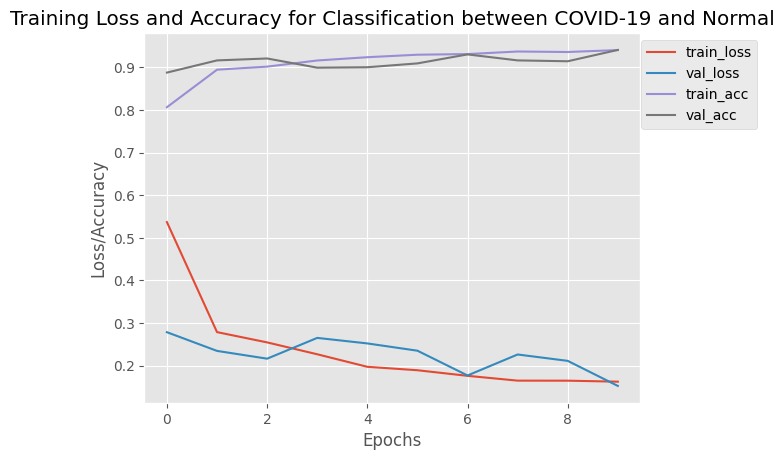

In [ ]:
#loss/accuracy graph
n=no_epochs
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, n), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy for Classification between COVID-19 and Normal")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.savefig("plot1.png")

In [ ]:
#to check test accuacy
modelLoss, modelAccuracy=model.evaluate(test_set, verbose=0)

print('Test Loss is: {}'.format(modelLoss))
print('Test Accuracy is: {}'.format(modelAccuracy ))

Test Loss is: 0.15212960541248322
Test Accuracy is: 0.9412355422973633


**PREDICTING THE OUTPUT**

In [ ]:
#loading the model
import tensorflow as tf
import keras
from tensorflow.keras.utils import img_to_array

model=keras.models.load_model('/content/drive/MyDrive/CPN Dataset/CPN_Model_VGG16.h5', custom_objects={'tf': tf})

In [ ]:
#get sample image to test
img_normal=tf.keras.utils.load_img('/content/drive/MyDrive/CPN Dataset/N1.png', target_size=(224, 224))

img_covid=tf.keras.utils.load_img('//content/drive/MyDrive/CPN Dataset/c3.png', target_size=(224, 224))

In [ ]:
def model_predict(img, actual):
    x=img_to_array(img)
    x=np.expand_dims(x, axis=0)
    x_processed=preprocess_input(x)
    result=model.predict(x_processed)
    index = np.argmax(result,axis=1)
    if index==0:
       result="covid-19"
    elif index==1:
       result="normal"
    else:
       result="pneumonia"

    plt.figure()
    plt.imshow(img)
    plt.title('Actual : {} --> Predicted  : {}'.format(actual, result))

1/1 [==============================] - 0s 67ms/step


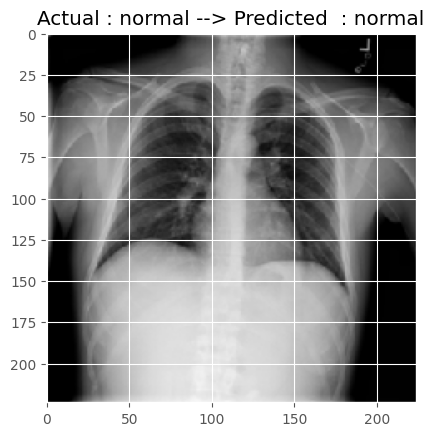

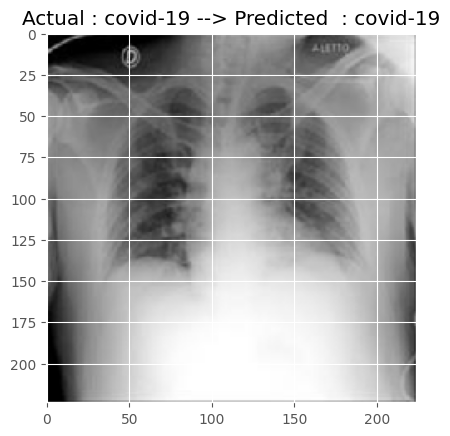

In [ ]:
pred_normal=model_predict(img_normal, "normal")

pred_covid=model_predict(img_covid, "covid-19")